In [17]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [18]:
#define a simple state 
class BMIstate(TypedDict):
    weight: float
    height: float
    bmi: float
    category: str

In [19]:
def calculate_bmi(state: BMIstate) -> BMIstate:
    """Calculate BMI from weight and height."""
    weight = state['weight']
    height = state['height']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2) # partially update the state with the calculated BMI
    return state


def lable_bmi(state: BMIstate) -> BMIstate:
    """Label the BMI category based on the calculated BMI."""
    bmi = state['bmi']
    if bmi < 18.5:
        state['category'] = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        state['category'] = 'Normal weight'
    elif 25 <= bmi < 29.9:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obesity'
    return state

In [20]:
# define a simple graph
graph = StateGraph(BMIstate)

# define a simple node
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("lable_bmi",lable_bmi)
# define edge
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "lable_bmi")
graph.add_edge("calculate_bmi", END)
#compile the graph
work_flow = graph.compile()



In [21]:
# execute the graph
init_state = BMIstate(weight=70, height=1.75, bmi=0.0, category="")

final_state = work_flow.invoke(init_state) # type: ignore
print(final_state)

{'weight': 70, 'height': 1.75, 'bmi': 22.86, 'category': 'Normal weight'}


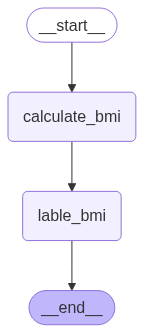

In [22]:
from IPython.display import Image
Image(work_flow.get_graph().draw_mermaid_png())